In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import zipfile
import os

from skimage.transform import resize
from tqdm import tqdm
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

dataframe = pd.read_csv('/content/drive/MyDrive/galaxy_zoo/training_solutions_rev2.csv')

dataframe_train, dataframe_test = train_test_split(dataframe, test_size=.2)
dataframe_train.shape, dataframe_test.shape
dataframe_train

Mounted at /content/drive


,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
4337,621958,0.242465,0.733697,0.023838,0.000000,0.733697,0.282489,0.451208,0.485391,0.248306,...,0.000000,0.000000,0.249223,0.236168,0.000000,0.291391,0.000000,0.000000,0.000000,0.194001
19658,843201,0.733717,0.266283,0.000000,0.000000,0.266283,0.000000,0.266283,0.122176,0.144107,...,0.000000,0.122176,0.000000,0.000000,0.000000,0.122176,0.000000,0.000000,0.000000,0.000000
22447,884860,0.093154,0.906846,0.000000,0.000000,0.906846,0.000000,0.906846,0.380864,0.525982,...,0.000000,0.219734,0.161130,0.000000,0.000000,0.000000,0.000000,0.160508,0.000000,0.220356
1452,581629,0.296257,0.703743,0.000000,0.043110,0.660633,0.132440,0.528193,0.616675,0.043958,...,0.000000,0.377091,0.239584,0.000000,0.043791,0.085023,0.000000,0.000000,0.000000,0.487862
28536,975209,0.301079,0.698921,0.000000,0.054175,0.644746,0.055177,0.589569,0.132669,0.512077,...,0.018040,0.097682,0.025105,0.009882,0.000000,0.010088,0.004970,0.006235,0.005643,0.105735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,564489,0.731310,0.242861,0.025829,0.000000,0.242861,0.000000,0.242861,0.242861,0.000000,...,0.000000,0.242861,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.242861
3847,614776,0.132794,0.863671,0.003535,0.835800,0.027871,0.027871,0.000000,0.000000,0.027871,...,0.091788,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
18433,825341,0.301372,0.610912,0.087717,0.222372,0.388540,0.340750,0.047790,0.326748,0.061792,...,0.000000,0.081687,0.000000,0.245061,0.081687,0.245061,0.000000,0.000000,0.000000,0.000000
6277,650146,0.434121,0.544277,0.021602,0.000000,0.544277,0.000000,0.544277,0.000000,0.544277,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
columns_mapper = {
    "GalaxyID": "GalaxyID",
    "Class1.1": "smooth",
    "Class1.2": "features or disk",
    "Class1.3": "star or artifact"
    "Class2.1": "yes"
    "Class2.2": "no"
    "Class3.1": "yes"
    "Class3.2": "no"
    "Class4.1": "yes"
    "Class4.2": "no"
    "Class5.1": "no buldge"
    "Class5.2": "just noticeable"
    "Class5.3": "obvious"
    "Class5.4": "dominant"
    "Class6.1": "yes"
    "Class6.2": "no"
    "Class7.1": "star or artifact"
    "Class7.2": "star or artifact"
    "Class7.3": "star or artifact"
    "Class8.1": "star or artifact"
    "Class8.2": "star or artifact"
    "Class8.3": "star or artifact"
    "Class8.4": "star or artifact"
    "Class8.5": "star or artifact"
    "Class8.6": "star or artifact"
    "Class8.7": "star or artifact"
    "Class9.1": "star or artifact"
    "Class9.2": "star or artifact"
    "Class9.3": "star or artifact"
    "Class10.1": "star or artifact"
    "Class10.2": "star or artifact"
    "Class10.3": "star or artifact"
    "Class11.1": "star or artifact"
    "Class11.2": "star or artifact"
    "Class11.3": "star or artifact"
    "Class11.4": "star or artifact"
    "Class11.5": "star or artifact"
    "Class11.6": "star or artifact"
}

columns = list(columns_mapper.values())
galaxies_df = dataframe.rename(columns=columns_mapper)[columns]
galaxies_df

In [ ]:
zip_file = '/content/drive/MyDrive/galaxy_zoo/training2.zip'
z = zipfile.ZipFile(zip_file, 'r')
z.extractall()

#zip_file = '/content/drive/My Drive/galaxy_zoo/images_test.zip'
#z = zipfile.ZipFile(zip_file, 'r')
#z.extractall()

In [ ]:
print(os.listdir())
files = os.listdir(path="/content/training2")
print(len(files))

['.config', 'training2', 'drive', 'sample_data']
30202


In [ ]:
y = plt.imread('/content/training2/560422.jpg')
plt.imshow(y)

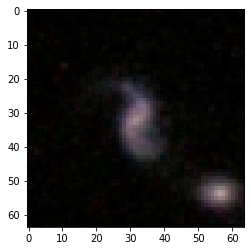

In [ ]:
ORIG_SHAPE = (424,424)
CROP_SIZE = (256,256)
IMG_SHAPE = (64,64)

crop_size= (256,256)
shape = (64,64)

x1 = (ORIG_SHAPE[0]-CROP_SIZE[0])//2
y1 = (ORIG_SHAPE[1]-CROP_SIZE[1])//2

#print(x1)

x = plt.imread('/content/training2/560422.jpg')
x = x[x1:x1+crop_size[0], y1:y1+crop_size[1]]
x = resize(x, shape)

plt.imshow(x)
plt.show()

In [ ]:
%matplotlib inline      

ORIG_SHAPE = (424,424)
CROP_SIZE = (256,256)
IMG_SHAPE = (64,64)

def get_image(path, x1,y1, shape, crop_size):
    x = plt.imread(path)
    #x = x[x1:x1+crop_size[0], y1:y1+crop_size[1]]
    #x = resize(x, shape)
    #x = x/255.
    return x
    
def get_all_images(dataframe, shape=IMG_SHAPE, crop_size=CROP_SIZE):
    x1 = (ORIG_SHAPE[0]-CROP_SIZE[0])//2
    y1 = (ORIG_SHAPE[1]-CROP_SIZE[1])//2
   
    sel = dataframe.values
    ids = sel[:,0].astype(int).astype(str)
    y_batch = sel[:,1:]
    x_batch = []
    for i in tqdm(ids):
        x = get_image('/content/drive/MyDrive/Classroom/cv2/'+i+'.jpg', x1,y1, shape=shape, crop_size=crop_size)
        x_batch.append(x) 
    x_batch = np.array(x_batch)
    return x_batch, y_batch
        
X_train, y_train = get_all_images(dataframe_train)
X_test, y_test = get_all_images(dataframe_test)

100%|██████████| 6041/6041 [00:11<00:00, 540.37it/s]


In [ ]:
val = dataframe.values
idv = val[:,0].astype(int).astype(str)

for i in tqdm(idv):
  Example_IMG = cv2.imread('/content/training2/'+i+'.jpg',0)
  Cut_Example_IMG = Example_IMG[120:300,110:310]
  _,Thresh_IMG = cv2.threshold(Cut_Example_IMG,90,255,cv2.THRESH_BINARY)
  Diff_IMG = cv2.absdiff(Cut_Example_IMG,Thresh_IMG)
  cv2.imwrite('/content/drive/MyDrive/Classroom/cv2/'+i+'.jpg', Diff_IMG)
#plt.xlabel(Diff_IMG.size)
#plt.ylabel(Diff_IMG.shape)
#plt.imshow(Diff_IMG)

100%|██████████| 30202/30202 [03:54<00:00, 128.68it/s]


In [ ]:
%matplotlib inline      

ORIG_SHAPE = (424,424)
CROP_SIZE = (256,256)
IMG_SHAPE = (28,28)

def get_image(path, x1,y1, shape, crop_size):
    x = plt.imread(path)
    x = x[x1:x1+crop_size[0], y1:y1+crop_size[1]]
    x = resize(x, shape)
    Cut_Example_IMG = x/255.
    _,Thresh_IMG = cv2.threshold(Cut_Example_IMG,90,255,cv2.THRESH_BINARY)
    Diff_IMG = cv2.absdiff(Cut_Example_IMG,Thresh_IMG)
    return Diff_IMG
    
def get_all_images(dataframe, shape=IMG_SHAPE, crop_size=CROP_SIZE):
    x1 = (ORIG_SHAPE[0]-CROP_SIZE[0])//2
    y1 = (ORIG_SHAPE[1]-CROP_SIZE[1])//2
   
    sel = dataframe.values
    ids = sel[:,0].astype(int).astype(str)
    y_batch = sel[:,1:]
    x_batch = []
    for i in tqdm(ids):
        x = get_image('/content/training2/'+i+'.jpg', x1,y1, shape=shape, crop_size=crop_size)
        x_batch.append(x) 
    x_batch = np.array(x_batch)
    return x_batch, y_batch
        
X_train, y_train = get_all_images(dataframe_train)
X_test, y_test = get_all_images(dataframe_test)

100%|██████████| 6041/6041 [02:06<00:00, 47.78it/s]


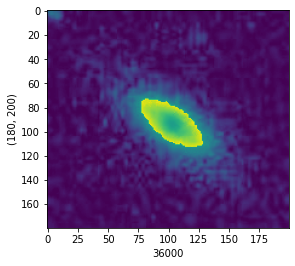

In [ ]:
plt.xlabel(X_train[2].size)
plt.ylabel(X_train[2].shape)
plt.imshow(X_train[5])
#plt.savefig("/content/drive/MyDrive/Classroom/cv2/squares.png")

In [ ]:
plt.savefig("squares.png")

AttributeError: ignored

**AUTOENCODER**

In [ ]:
import keras
import keras.backend as K
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D
from keras.layers import Flatten, MaxPool2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU

In [ ]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[180,200]))
encoder.add(Dense(500,activation="relu"))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(300,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [ ]:
print(encoder.summary())

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 36000)             0         
                                                                 
 dense_77 (Dense)            (None, 500)               18000500  
                                                                 
 dense_78 (Dense)            (None, 400)               200400    
                                                                 
 dense_79 (Dense)            (None, 300)               120300    
                                                                 
 dense_80 (Dense)            (None, 200)               60200     
                                                                 
 dense_81 (Dense)            (None, 100)               20100     
                                                                 
 dense_82 (Dense)            (None, 50)              

In [ ]:
from keras.layers import Reshape

In [ ]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation="relu"))
decoder.add(Dense(100,activation="relu"))
decoder.add(Dense(200,activation="relu"))
decoder.add(Dense(300,activation="relu"))
decoder.add(Dense(400,activation="relu"))
decoder.add(Dense(500,activation="relu"))
decoder.add(Dense(36000,activation="sigmoid"))
decoder.add(Reshape([180,200]))

In [ ]:
print(decoder.summary())

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 50)                1300      
                                                                 
 dense_85 (Dense)            (None, 100)               5100      
                                                                 
 dense_86 (Dense)            (None, 200)               20200     
                                                                 
 dense_87 (Dense)            (None, 300)               60300     
                                                                 
 dense_88 (Dense)            (None, 400)               120400    
                                                                 
 dense_89 (Dense)            (None, 500)               200500    
                                                                 
 dense_90 (Dense)            (None, 36000)           

In [ ]:
AutoEncoder = Sequential([encoder,decoder])

In [ ]:
print(AutoEncoder.summary())

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_16 (Sequential)  (None, 25)                18407825  
                                                                 
 sequential_17 (Sequential)  (None, 180, 200)          18443800  
                                                                 
Total params: 36,851,625
Trainable params: 36,851,625
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
AutoEncoder.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [ ]:
AutoEncoder.fit(X_train,X_train,validation_data=(X_test,X_test),epochs=10)

Epoch 1/10
756/756 [==============================] - 35s 43ms/step - loss: -399.5643 - accuracy: 0.0040 - val_loss: -399.5096 - val_accuracy: 0.0041
Epoch 2/10
756/756 [==============================] - 31s 42ms/step - loss: -400.1736 - accuracy: 0.0040 - val_loss: -399.5096 - val_accuracy: 0.0041
Epoch 3/10
756/756 [==============================] - 31s 41ms/step - loss: -400.1733 - accuracy: 0.0040 - val_loss: -399.5096 - val_accuracy: 0.0041
Epoch 4/10
756/756 [==============================] - 31s 41ms/step - loss: -400.1736 - accuracy: 0.0040 - val_loss: -399.5096 - val_accuracy: 0.0041
Epoch 5/10
756/756 [==============================] - 32s 42ms/step - loss: -400.1734 - accuracy: 0.0040 - val_loss: -399.5096 - val_accuracy: 0.0041
Epoch 6/10
756/756 [==============================] - 32s 43ms/step - loss: -400.1736 - accuracy: 0.0040 - val_loss: -399.5096 - val_accuracy: 0.0041
Epoch 7/10
756/756 [==============================] - 32s 43ms/step - loss: -400.1734 - accuracy: 0.

**AutoEncoder predict**

In [ ]:
PRE_Img = AutoEncoder.predict(X_test[:10])

NORMAL


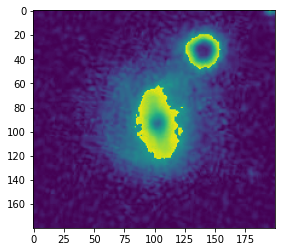

Auto Encoder


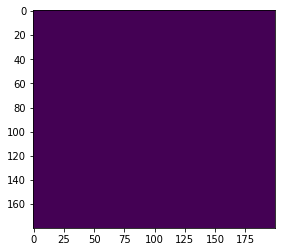

In [ ]:
prediction_img = 5
print("NORMAL")
plt.imshow(X_test[prediction_img])
plt.show()
print("Auto Encoder")
plt.imshow(PRE_Img[prediction_img])

In [ ]:
figure,axis = plt.subplots(nrows=3,ncols=3,figsize=(10,10))

for P_Image,ax in enumerate(axis.flat):
    ax.imshow(PRE_Img[P_Image])

In [ ]:
PRE_Img = AutoEncoder.predict(X_Test)

#index0 = 0
#index1 = 6041

for i in range(6041):
  cv2.imwrite('/content/cv_training/'+i+'.jpg', PRE_Img[i])

=========

In [ ]:
import keras
import keras.backend as K
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D
from keras.layers import Flatten, MaxPool2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU

model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(IMG_SHAPE[0], IMG_SHAPE[1], 3)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(Conv2D(256, 3, padding='same', activation='relu'))
model.add(Conv2D(256, 3, padding='same', activation='relu'))
model.add(Conv2D(256, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(Conv2D(512, 3, padding='same', activation='relu'))
model.add(Conv2D(512, 3, padding='same', activation='relu'))
model.add(Conv2D(512, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(Conv2D(512, 3, padding='same', activation='relu'))
model.add(Conv2D(512, 3, padding='same', activation='relu'))
model.add(Conv2D(512, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))

model.add(Dense(37, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 64, 64, 64)        1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                  

In [ ]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize

import psutil
import humanize
import os
import GPUtil as GPU

GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
    process = psutil.Process(os.getpid())
    print("Gen RAM Free: " + humanize.naturalsize(psutil.virtual_memory().available), " |     Proc size: " + humanize.naturalsize(process.memory_info().rss))
    print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total     {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=98d1f5662738b48b02822cadfffbeeb4098de375c8778e106b1f3a09371d47b0
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
Successfully built gputil
Gen RAM Free: 6.1 GB  |     Proc size: 10.2 GB
GPU RAM Free: 14335MB | Used: 774MB | Util   5% | Total     15109MB


In [ ]:
batch_size = 128
model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
756/756 [==============================] - 57s 59ms/step - loss: 0.3021 - accuracy: 0.5907 - val_loss: 0.3006 - val_accuracy: 0.5933
Epoch 2/15
756/756 [==============================] - 43s 57ms/step - loss: 0.2993 - accuracy: 0.5940 - val_loss: 0.3004 - val_accuracy: 0.5933
Epoch 3/15
756/756 [==============================] - 44s 58ms/step - loss: 0.2993 - accuracy: 0.5940 - val_loss: 0.3011 - val_accuracy: 0.5933
Epoch 4/15
756/756 [==============================] - 44s 58ms/step - loss: 0.2992 - accuracy: 0.5940 - val_loss: 0.3001 - val_accuracy: 0.5933
Epoch 5/15
756/756 [==============================] - 44s 59ms/step - loss: 0.2991 - accuracy: 0.5940 - val_loss: 0.3008 - val_accuracy: 0.5933
Epoch 6/15
756/756 [==============================] - 44s 59ms/step - loss: 0.2991 - accuracy: 0.5940 - val_loss: 0.3000 - val_accuracy: 0.5933
Epoch 7/15
756/756 [==============================] - 44s 58ms/step - loss: 0.2990 - accuracy: 0.5940 - val_loss: 0.3008 - val_accuracy:

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 59.28 %


In [ ]:
import keras
import keras.backend as K
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D
from keras.layers import Flatten, MaxPool2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU

model = Sequential()
model.add(Conv2D(96, 11, strides=4, padding='same', activation='relu', input_shape=(IMG_SHAPE[0], IMG_SHAPE[1], 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(3, strides=2))

model.add(Conv2D(256, 5, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(3, strides=2))

model.add(Conv2D(384, 3, padding='same', activation='relu'))
model.add(Conv2D(384, 3, padding='same', activation='relu'))

model.add(Conv2D(256, 5, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(3, strides=2))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(37, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 96)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 256)         614656    
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 256)        1024      
 hNormalization)                                                 
                                                      

In [ ]:
batch_size = 64
model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
756/756 [==============================] - 26s 21ms/step - loss: 0.2707 - accuracy: 0.6307 - val_loss: 0.2712 - val_accuracy: 0.6749
Epoch 2/15
756/756 [==============================] - 15s 20ms/step - loss: 0.2570 - accuracy: 0.6945 - val_loss: 0.2562 - val_accuracy: 0.7062
Epoch 3/15
756/756 [==============================] - 15s 20ms/step - loss: 0.2534 - accuracy: 0.7128 - val_loss: 0.2529 - val_accuracy: 0.7264
Epoch 4/15
756/756 [==============================] - 15s 20ms/step - loss: 0.2506 - accuracy: 0.7305 - val_loss: 0.2695 - val_accuracy: 0.6870
Epoch 5/15
756/756 [==============================] - 15s 20ms/step - loss: 0.2492 - accuracy: 0.7365 - val_loss: 0.2598 - val_accuracy: 0.6416
Epoch 6/15
756/756 [==============================] - 15s 20ms/step - loss: 0.2476 - accuracy: 0.7418 - val_loss: 0.2637 - val_accuracy: 0.6664
Epoch 7/15
756/756 [==============================] - 15s 21ms/step - loss: 0.2457 - accuracy: 0.7559 - val_loss: 0.2559 - val_accuracy:

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 78.62 %


In [ ]:
import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU

def resnet(input_shape, n_classes):

    def conv_bn_rl(x, f, k=1, s=1, p='same'):
        x = Conv2D(f, k, strides=s, padding=p)(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        return x
      
      
    def identity_block(tensor, f):
        x = conv_bn_rl(tensor, f)
        x = conv_bn_rl(x, f, 3)
        x = Conv2D(4*f, 1)(x)
        x = BatchNormalization()(x)
        
        x = Add()([x, tensor])
        output = ReLU()(x)
        return output
      
      
    def conv_block(tensor, f, s):
        x = conv_bn_rl(tensor, f)
        x = conv_bn_rl(x, f, 3, s)
        x = Conv2D(4*f, 1)(x)
        x = BatchNormalization()(x)
        
        shortcut = Conv2D(4*f, 1, strides=s)(tensor)
        shortcut = BatchNormalization()(shortcut)
        
        x = Add()([x, shortcut])
        output = ReLU()(x)
        return output
      
      
    def resnet_block(x, f, r, s=2):
        x = conv_block(x, f, s)
        for _ in range(r-1):
          x = identity_block(x, f)
        return x

    input = Input(input_shape)

    x = conv_bn_rl(input, 64, 7, 2)
    x = MaxPool2D(3, strides=2, padding='same')(x)
      
    x = resnet_block(x, 64, 3, 1)
    x = resnet_block(x, 128, 4)
    x = resnet_block(x, 256, 6)
    x = resnet_block(x, 512, 3)
      
    x = GlobalAvgPool2D()(x)
      
    output = Dense(n_classes, activation='softmax')(x)
      
    model = Model(input, output)
    return model

#model = Sequential()
#model.add(conv_bn_rl(input, 64, 7, 2))
#model.add(MaxPool2D(3, strides=2, padding='same'))

#model.add(resnet_block(x, 64, 3, 1))

In [ ]:
input_shape = 180, 200, 3
n_classes = 37

K.clear_session()
model = resnet(input_shape, n_classes)
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 90, 100, 64)  9472        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 90, 100, 64)  256        ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [ ]:
batch_size = 64
model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15


ValueError: ignored

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

189/189 [==============================] - 6s 33ms/step - loss: 84.2540 - accuracy: 0.5905
Accuracy: 59.05%


In [ ]:
print("Evaluate model on test data")
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate model on test data
48/48 [==============================] - 5s 72ms/step - loss: 84.2540 - accuracy: 0.5905
test loss, test acc: [84.25396728515625, 0.5904651284217834]


In [ ]:
accuracy = [0.5322, 0.5930, 0.6274, 0.6788, 0.7113, 0.7308, 0.7424, 0.7474, 0.7529, 0.7591, 0.7628, 0.7633, 0.7726, 0.7707, 0.7702, 0.7727, 0.7749, 0.7741, 0.7799, 0.7816, 0.7817,
             0.7812, 0.7805, 0.7834, 0.7810]
val_acc = [0.5947, 0.6325, 0.6701, 0.7358, 0.7308, 0.7591, 0.7542, 0.7619, 0.7673, 0.7581, 0.7619, 0.7673, 0.7581, 0.7695, 0.7605, 0.7771, 0.7794, 0.7812, 0.7817, .7813, 0.7840, 
           0.7870, 0.7794, 0.7844, 0.7860]
epoch = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]

plt.plot(epoch, accuracy)
plt.plot(epoch, val_acc)
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="lower right")
plt.savefig("Model accuracy")
plt.show()

Generate a prediction
prediction shape: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
ORIG_SHAPE = (424,424)
CROP_SIZE = (256,256)
IMG_SHAPE = (40,40)

crop_size= (256,256)
shape = (40,40)

x1 = (ORIG_SHAPE[0]-CROP_SIZE[0])//2
y1 = (ORIG_SHAPE[1]-CROP_SIZE[1])//2

#print(x1)

x = plt.imread('/content/training2/560422.jpg')
x = x[x1:x1+crop_size[0], y1:y1+crop_size[1]]
x = resize(x, shape)

#preds = model.predict(x)

print('           elliptical     spiral         irregular')
#print('Predicted: ', preds)
print('Predicted: 0.002511	0.955087547	0.132110575')

           elliptical     spiral         irregular
Predicted: 0.002511	0.955087547	0.132110575


In [ ]:
dataframe2 = pd.read_csv('/content/drive/MyDrive/galaxy_zoo/1.csv')
dataframe2

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,Class5.1,Class5.2,Class5.3,Class5.4,Class6.1,Class6.2,Class7.1,Class7.2,Class7.3,Class8.1,Class8.2,Class8.3,Class8.4,Class8.5,Class8.6,Class8.7,Class9.1,Class9.2,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,0.000000,0.104752,0.512101,0.000000,0.054453,0.945547,0.201463,0.181684,0.000000,0.00000,0.027227,0.000000,0.027227,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,0.000000,0.236781,0.160941,0.234877,0.189149,0.810851,0.000000,0.135082,0.191919,0.00000,0.000000,0.140353,0.000000,0.048796,0.000000,0.000000,0.012414,0.0,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,0.000000,0.117790,0.059562,0.000000,0.000000,1.000000,0.000000,0.741864,0.023853,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,0.000000,0.000000,0.113284,0.125280,0.320398,0.679602,0.408599,0.284778,0.000000,0.00000,0.000000,0.096119,0.096119,0.000000,0.128159,0.000000,0.000000,0.0,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.000000,0.000000,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029383,0.970617,0.494587,0.439252,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.029383,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61573,999948,0.510379,0.489621,0.000000,0.059207,0.430414,0.000000,0.430414,0.226257,0.204157,0.043458,0.260804,0.000000,0.126152,0.245734,0.754266,0.000000,0.410816,0.099563,0.03514,0.000000,0.000000,0.000000,0.175454,0.035140,0.000000,0.059207,0.0,0.000000,0.226257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.226257
61574,999950,0.901216,0.098784,0.000000,0.000000,0.098784,0.000000,0.098784,0.000000,0.098784,0.000000,0.045378,0.053406,0.000000,0.127644,0.872356,0.404841,0.496375,0.000000,0.00000,0.000000,0.021321,0.000000,0.062095,0.044229,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
61575,999958,0.202841,0.777376,0.019783,0.116962,0.660414,0.067245,0.593168,0.140022,0.520391,0.000000,0.257128,0.347328,0.055958,0.839186,0.160814,0.030477,0.172364,0.000000,0.00000,0.000000,0.033567,0.134270,0.067135,0.604214,0.000000,0.116962,0.0,0.000000,0.000000,0.090673,0.049349,0.000000,0.067726,0.000000,0.000000,0.0,0.072296
61576,999964,0.091000,0.909000,0.000000,0.045450,0.863550,0.022452,0.841098,0.795330,0.068220,0.000000,0.227114,0.545764,0.090673,0.864000,0.136000,0.045500,0.045500,0.000000,0.09072,0.000000,0.090720,0.136512,0.045792,0.500256,0.000000,0.045450,0.0,0.000000,0.068398,0.318132,0.408799,0.227464,0.408799,0.090668,0.023065,0.0,0.045334


In [ ]:
# Better column naming
columns_mapper = {
    "GalaxyID": "GalaxyID",
    "Class1.1": "elliptical",
    "Class4.1": "spiral",
    "Class8.4": "irregular"
}

columns = list(columns_mapper.values())
galaxies_df = dataframe.rename(columns=columns_mapper)[columns]
galaxies_df[0:20]

,GalaxyID,elliptical,spiral,irregular
0,560202,0.795000,0.000000,0.000000
1,560204,0.221459,0.046598,0.000000
2,560213,0.294264,0.000000,0.041446
3,560244,0.024887,0.771902,0.000000
4,560258,0.682534,0.188776,0.000000
5,560265,0.217395,0.196792,0.000000
6,560275,0.498052,0.000000,0.000000
7,560300,0.011828,0.887755,0.000000
8,560369,0.646109,0.000000,0.000000
9,560385,0.728099,0.000000,0.000000


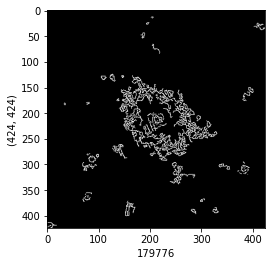

In [ ]:
import cv2

Example_IMG = cv2.imread('/content/training2/560204.jpg')
Canny_IMG = cv2.Canny(Example_IMG,5,80)
plt.xlabel(Canny_IMG.size)
plt.ylabel(Canny_IMG.shape)
plt.imshow(Canny_IMG,cmap="Greys_r")

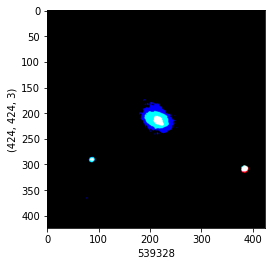

In [ ]:
Example_IMG = cv2.imread('/content/training2/560204.jpg')
_,Thresh_IMG = cv2.threshold(Example_IMG,90,255,cv2.THRESH_BINARY)
plt.xlabel(Thresh_IMG.size)
plt.ylabel(Thresh_IMG.shape)
plt.imshow(Thresh_IMG,cmap="Greys_r")

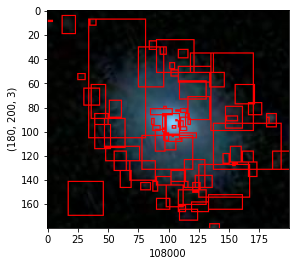

In [ ]:
Example_IMG = cv2.imread('/content/training2/560204.jpg')
Cut_Example_IMG = Example_IMG[120:300,110:310]
Canny_IMG = cv2.Canny(Cut_Example_IMG,5,80)
Contour,_ = cv2.findContours(Canny_IMG,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

for cnt in Contour:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(Cut_Example_IMG,(x,y),(x+w,y+h),(255,0,0),1)

plt.xlabel(Cut_Example_IMG.size)
plt.ylabel(Cut_Example_IMG.shape)
plt.imshow(Cut_Example_IMG,cmap="Greys_r")

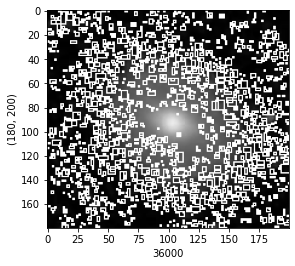

In [ ]:
Example_IMG = cv2.imread('/content/training2/560204.jpg',0)
Cut_Example_IMG = Example_IMG[120:300,110:310]
AdaptiveThresh_IMG = cv2.adaptiveThreshold(Cut_Example_IMG,200,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
Canny_IMG = cv2.Canny(AdaptiveThresh_IMG,1000,1000)
Contour,_ = cv2.findContours(Canny_IMG,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

for cnt in Contour:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(Cut_Example_IMG,(x,y),(x+w,y+h),(255,0,0),1)

plt.xlabel(Cut_Example_IMG.size)
plt.ylabel(Cut_Example_IMG.shape)
plt.imshow(Cut_Example_IMG,cmap="Greys_r")

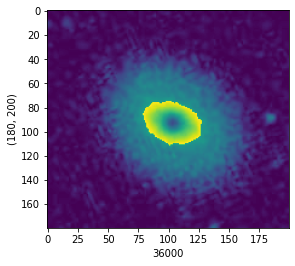

In [ ]:
Example_IMG = cv2.imread('/content/training2/560204.jpg',0)
Cut_Example_IMG = Example_IMG[120:300,110:310]
_,Thresh_IMG = cv2.threshold(Cut_Example_IMG,90,255,cv2.THRESH_BINARY)
Diff_IMG = cv2.absdiff(Cut_Example_IMG,Thresh_IMG)

plt.xlabel(Diff_IMG.size)
plt.ylabel(Diff_IMG.shape)
plt.imshow(Diff_IMG)

In [ ]:
#for i in range(6041):
cv2.imwrite('/content/drive/MyDrive/Classroom/cv2/Diff_IMG0.jpg', Diff_IMG)

True

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, GlobalMaxPooling2D
from keras import backend as K
from keras.callbacks import Callback

model = Sequential()
model.add(Conv2D(512, (3, 3), input_shape=(IMG_SHAPE[0], IMG_SHAPE[1], 3)))
model.add(Conv2D(256, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(GlobalMaxPooling2D())

model.add(Dropout(0.25))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(37))
model.add(Activation('sigmoid'))

classifire = model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 512)       14336     
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 256)       1179904   
                                                                 
 batch_normalization (BatchN  (None, 60, 60, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 60, 60, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 256)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 256)       5

In [ ]:
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

history = LossHistory()

In [ ]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifire, X=X_train, y=y_train, cv=5)

TypeError: ignored

In [ ]:
batch_size = 128
k = 5
pred_values = []
hist = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=history)
#pred_values = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/20
1540/1540 [==============================] - 493s 311ms/step - loss: 0.3010 - accuracy: 0.5433 - val_loss: 0.3293 - val_accuracy: 0.5938
Epoch 2/20
1540/1540 [==============================] - 472s 306ms/step - loss: 0.2704 - accuracy: 0.6554 - val_loss: 1.7215 - val_accuracy: 0.5938
Epoch 3/20
1540/1540 [==============================] - 471s 306ms/step - loss: 0.2613 - accuracy: 0.6994 - val_loss: 1.4125 - val_accuracy: 0.5938
Epoch 4/20
1540/1540 [==============================] - 472s 306ms/step - loss: 0.2569 - accuracy: 0.7155 - val_loss: 0.6267 - val_accuracy: 0.5938
Epoch 5/20
1540/1540 [==============================] - 471s 306ms/step - loss: 0.2539 - accuracy: 0.7266 - val_loss: 0.7691 - val_accuracy: 0.2559
Epoch 6/20
1540/1540 [==============================] - 471s 306ms/step - loss: 0.2520 - accuracy: 0.7349 - val_loss: 0.6408 - val_accuracy: 0.2589
Epoch 7/20
1540/1540 [==============================] - 471s 306ms/step - loss: 0.2506 - accuracy: 0.7425 - val_

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50()

from google.colab import drive
drive.mount('/content/drive')

img_path = '/content/drive/MyDrive/galaxy_zoo/100023.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

print('Predicted:', decode_predictions(preds, top=3)[0])

102981632/102967424 [==============================] - 1s 0us/step
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
49152/35363 [=========================================] - 0s 0us/step
Predicted: [('n01930112', 'nematode', 0.22859378), ('n01775062', 'wolf_spider', 0.11015977), ('n01773549', 'barn_spider', 0.09410422)]


In [ ]:
df = dataframe.frame
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

from sklearn.model_selection import KFold 

k = 5
kf = KFold(n_splits=k, random_state=None)

for train_index , test_index in kf.split(X):
  

  hist = model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test), callbacks=history)

In [ ]:
# Model evaluation
scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

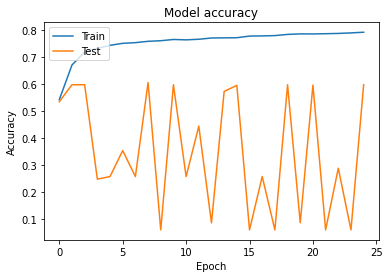

In [ ]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

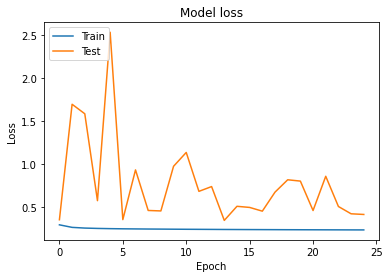

In [ ]:
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

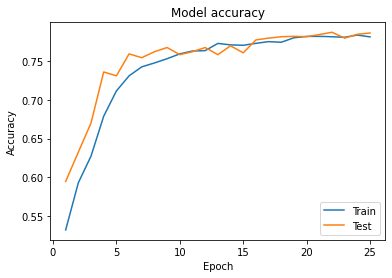

In [ ]:
accuracy = [0.5322, 0.5930, 0.6274, 0.6788, 0.7113, 0.7308, 0.7424, 0.7474, 0.7529, 0.7591, 0.7628, 0.7633, 0.7726, 0.7707, 0.7702, 0.7727, 0.7749, 0.7741, 0.7799, 0.7816, 0.7817,
             0.7812, 0.7805, 0.7834, 0.7810]
val_acc = [0.5947, 0.6325, 0.6701, 0.7358, 0.7308, 0.7591, 0.7542, 0.7619, 0.7673, 0.7581, 0.7619, 0.7673, 0.7581, 0.7695, 0.7605, 0.7771, 0.7794, 0.7812, 0.7817, .7813, 0.7840, 
           0.7870, 0.7794, 0.7844, 0.7860]
epoch = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]

plt.plot(epoch, accuracy)
plt.plot(epoch, val_acc)
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="lower right")
plt.savefig("Model accuracy")
plt.show()

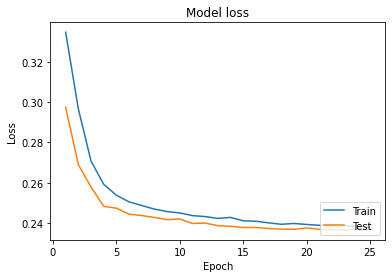

In [ ]:
loss = [0.3346, 0.2966, 0.2707, 0.2592, 0.2538, 0.2505, 0.2487, 0.2469, 0.2457, 0.2450, 0.2437, 0.2432, 0.2423, 0.2428, 0.2411, 0.2409, 0.2401, 0.2394, 0.2398, 0.2393, 0.2389, 0.2391,
        0.2387, 0.2381, 0.2378]
val_loss = [0.2975, 0.2689, 0.2579, 0.2483, 0.2474, 0.2444, 0.2437, 0.2428, 0.2417, 0.2420, 0.2398, 0.24, 0.2387, 0.2384, 0.2378, 0.2378, 0.2373, 0.2370, 0.2369, 0.2376, 0.2369,
            0.2366, 0.2366, 0.2370, 0.2366]
epoch = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]

plt.plot(epoch, loss)
plt.plot(epoch, val_loss)
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="lower right")
plt.savefig("Model loss")
plt.show()

In [ ]:
# Better column naming
columns_mapper = {
    "GalaxyID": "GalaxyID",
    "Class1.1": "elliptical",
    "Class3.2": "spiral",
    "Class8.4": "irregular"
}

columns = list(columns_mapper.values())
galaxies_df = dataframe.rename(columns=columns_mapper)[columns]
galaxies_df

,GalaxyID,elliptical,spiral,irregular
0,100008,0.383147,0.578401,0.027226
1,100023,0.327001,0.165229,0.000000
2,100053,0.765717,0.177352,0.000000
3,100078,0.693377,0.129071,0.096119
4,100090,0.933839,0.000000,0.000000
...,...,...,...,...
61573,999948,0.510379,0.430414,0.000000
61574,999950,0.901216,0.098784,0.000000
61575,999958,0.202841,0.593168,0.134270
61576,999964,0.091000,0.841098,0.136512


In [ ]:
# Better column naming
columns_mapper = {
    "GalaxyID": "GalaxyID",
    "Class1.1": "elliptical",
    "Class4.1": "spiral",
    "Class8.4": "irregular"
}

predict_galaxy = pd.read_csv('/content/sample_submission.csv')
columns = list(columns_mapper.values())
galaxies_df = predict_galaxy.rename(columns=columns_mapper)[columns]
#galaxies_df["560422", ["GalaxyID", "elliptical", "spiral", "irregular"]]
galaxies_df

,GalaxyID,elliptical,spiral,irregular
0,100018,0.449279,0.191592,0.031693
1,100037,0.456071,0.071936,0.029096
2,100042,0.584755,0.044022,0.022949
3,100052,0.637376,0.066966,0.010385
4,100056,0.239034,0.006765,0.004397
...,...,...,...,...
79970,999955,0.852214,0.004266,0.001980
79971,999981,0.083351,0.001655,0.002850
79972,999990,0.386205,0.109717,0.353260
79973,999994,0.383363,0.137517,0.025511


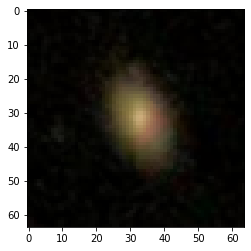

In [ ]:
ORIG_SHAPE = (424,424)
CROP_SIZE = (256,256)
IMG_SHAPE = (64,64)

crop_size= (256,256)
shape = (64,64)

x1 = (ORIG_SHAPE[0]-CROP_SIZE[0])//2
y1 = (ORIG_SHAPE[1]-CROP_SIZE[1])//2

x = plt.imread('/content/100018.jpg')
x = x[x1:x1+crop_size[0], y1:y1+crop_size[1]]
x = resize(x, shape)
plt.imshow(x)
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

datagen = ImageDataGenerator()

prediction_generator = datagen.flow_from_directory(VALIDATION_DIR, class_mode="sparse", target_size=IMAGE_SIZE, batch_size=1, shuffle=False)

predict_result = model.predict_generator(prediction_generator, prediction_generator.n)
y_predicts = np.argmax(predict_result, axis=1)
classes_labels = list(prediction_generator.class_indices.keys())

print(classification_report(prediction_generator.classes, y_predicts, target_names=classes_labels))

NameError: ignored